In [1]:
from utils import *
%matplotlib inline

# Question 1

In [5]:
modify_param('flx_scheme', 1)
modify_param('timestep_scheme', 1)

In [6]:
modify_param('max_iter', 10000)
modify_param('p_exit_ratio', 0.8)
modify_param('nx', 50)
modify_param('eps', 0.35)

In [7]:
run()

u' Number of iterations:\n        6197\n Error\n   8.8817841970012523E-016\n'

In [8]:
state, resi, time = read_data()

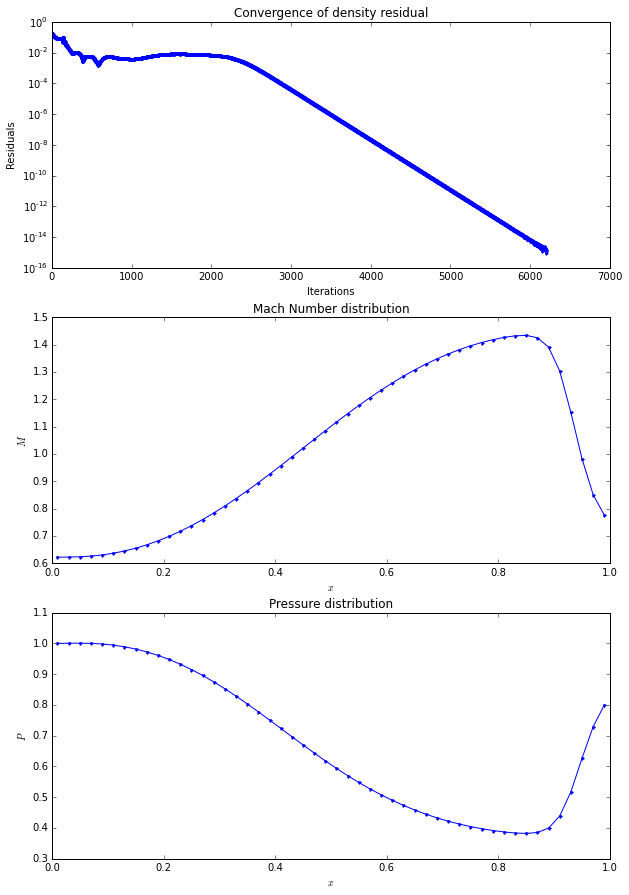

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
plot_residual(resi, ax1)
plot_mach(state, ax2)
plot_pressure(state, ax3)

# Question 2 - Exit Pressure Study

In [10]:
def pressure_study(p_exit_ratio, eps):
    modify_param('p_exit_ratio', p_exit_ratio)
    modify_param('eps', eps)
    run()
    title_extra = '\nratio=%.2f' % p_exit_ratio
    state, resi, time = read_data()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    plot_pressure(state, ax1, title_extra)
    plot_mach(state, ax2)
    plot_residual(resi, ax3, title_extra)

This is as good as it gets


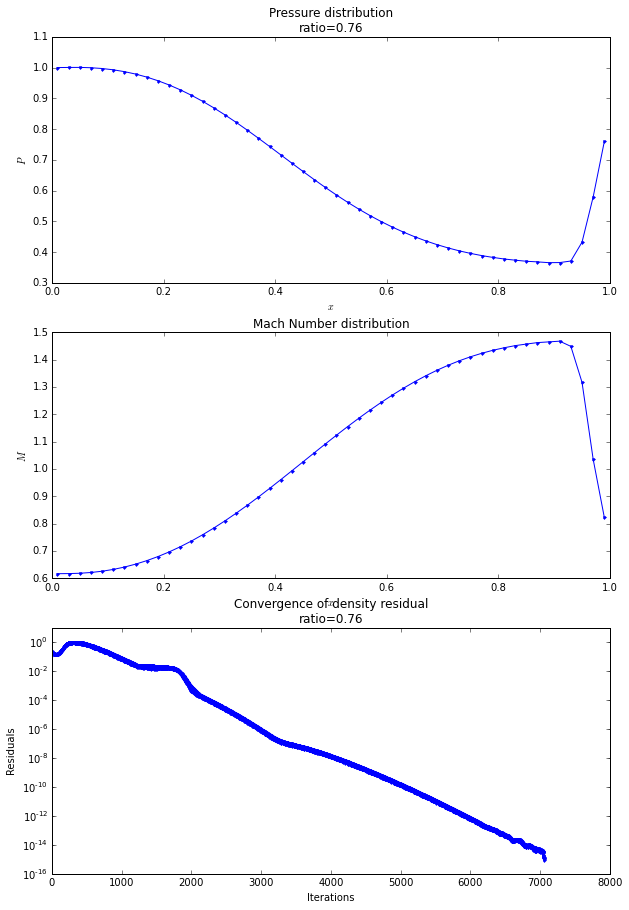

In [11]:
eps = 0.21
pressure_study(0.76, eps)
print("This is as good as it gets")

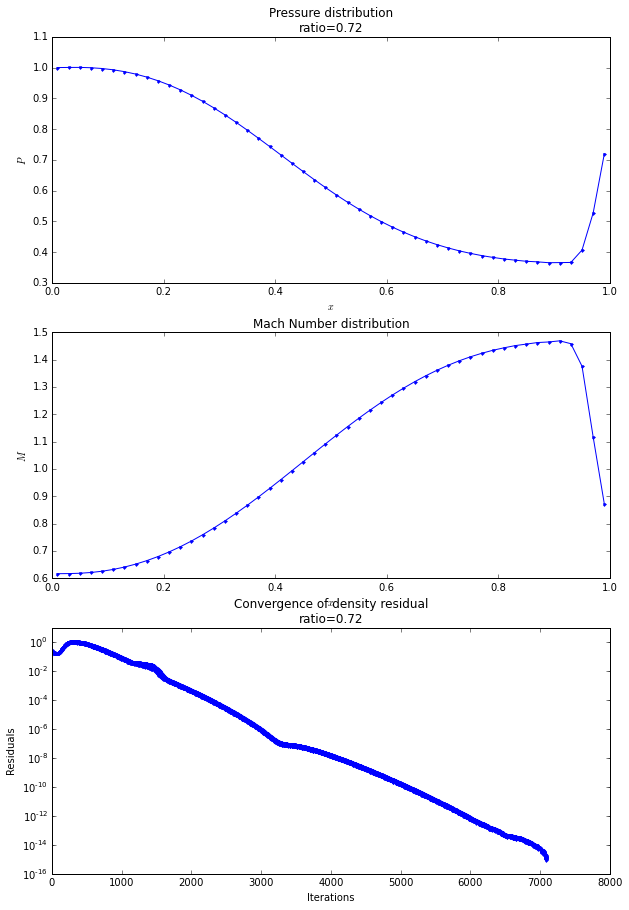

In [12]:
pressure_study(0.72, eps)

The shock was completely eliminated in this case!


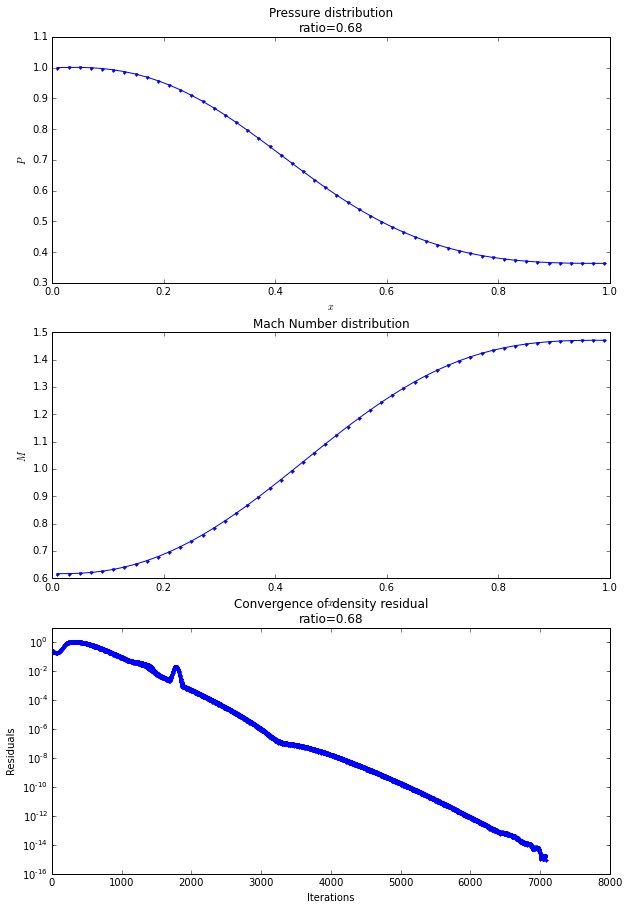

In [13]:
pressure_study(0.68, eps)
print("The shock was completely eliminated in this case!")

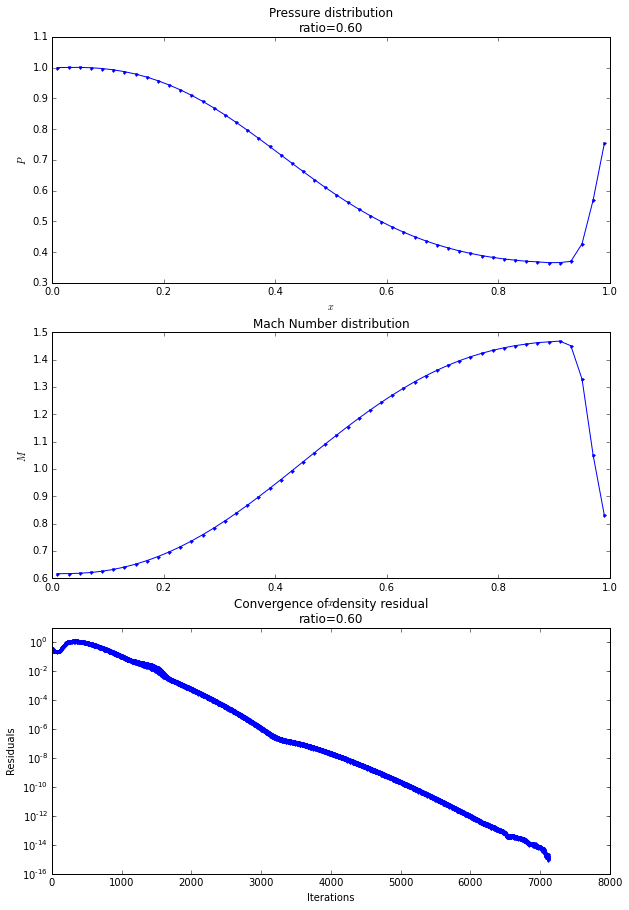

In [14]:
pressure_study(0.60, eps)

---
# Question 3 - Grid Study

In [15]:
modify_param('max_iter', 20000)
modify_param('p_exit_ratio', 0.72)
modify_param('eps', 0.3)

In [16]:
def grid_study(nx):
    modify_param('nx', nx)
    run()
    title_extra = '\nnx=%d' % nx
    state, resi, time = read_data()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    plot_residual(resi, ax1, title_extra)
    plot_mach(state, ax2)
    plot_pressure(state, ax3, title_extra)

In [21]:
# grid_study(25)

In [22]:
# grid_study(50)

In [23]:
# grid_study(100)

In [24]:
# grid_study(200)

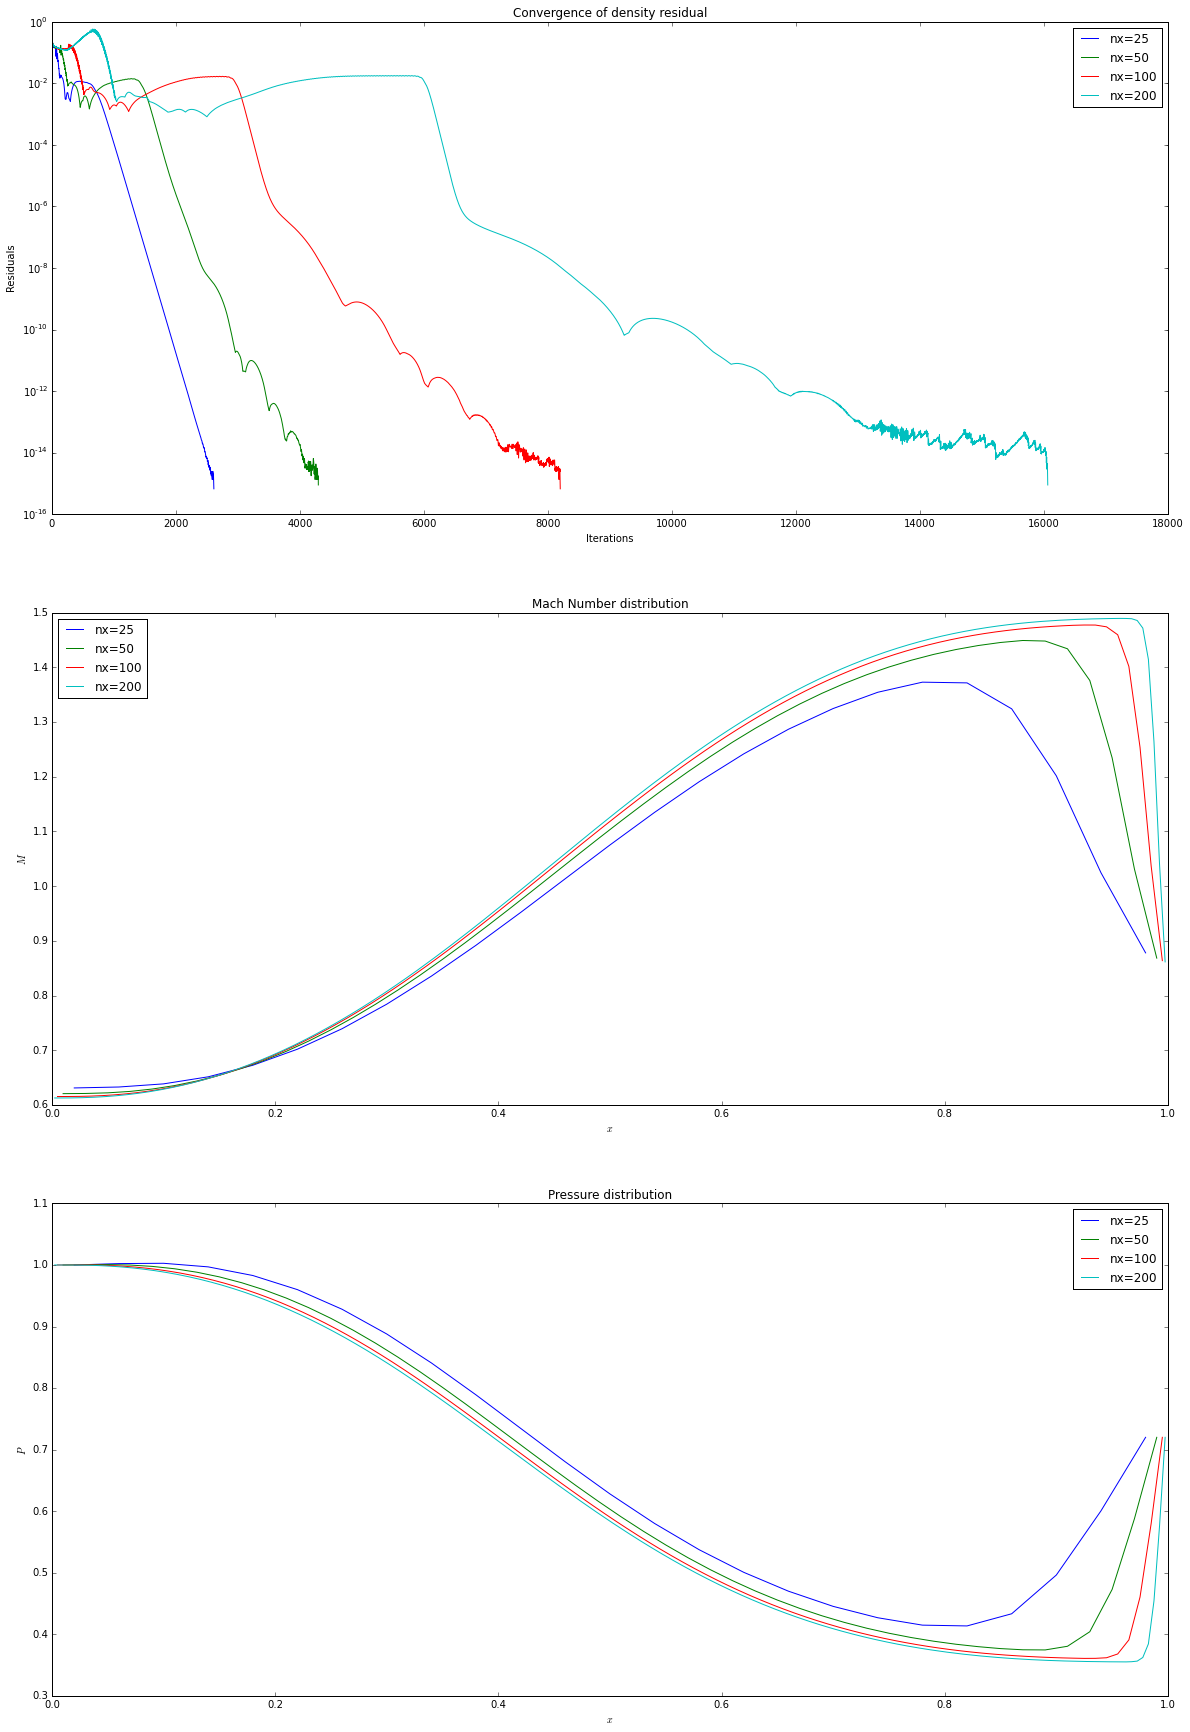

In [27]:
opt = {'marker': None}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
results = []
nxs = [25, 50, 100, 200]
for i, nx in enumerate(nxs):
    modify_param('nx', nx)
    _=run()
    state, resi, time = read_data()
    plot_residual(resi, ax1, label='nx=%d' % nx, **opt)
    plot_mach(state, ax2, label='nx=%d' % nx, **opt)
    plot_pressure(state, ax3, label='nx=%d' % nx, **opt)
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.show()

### Discussion
Refining the mesh takes more iterations.

However, the solutions seem to be converging towards a mesh-independent solution.

---
# Question 4 - Spatial Discretization Scheme Study

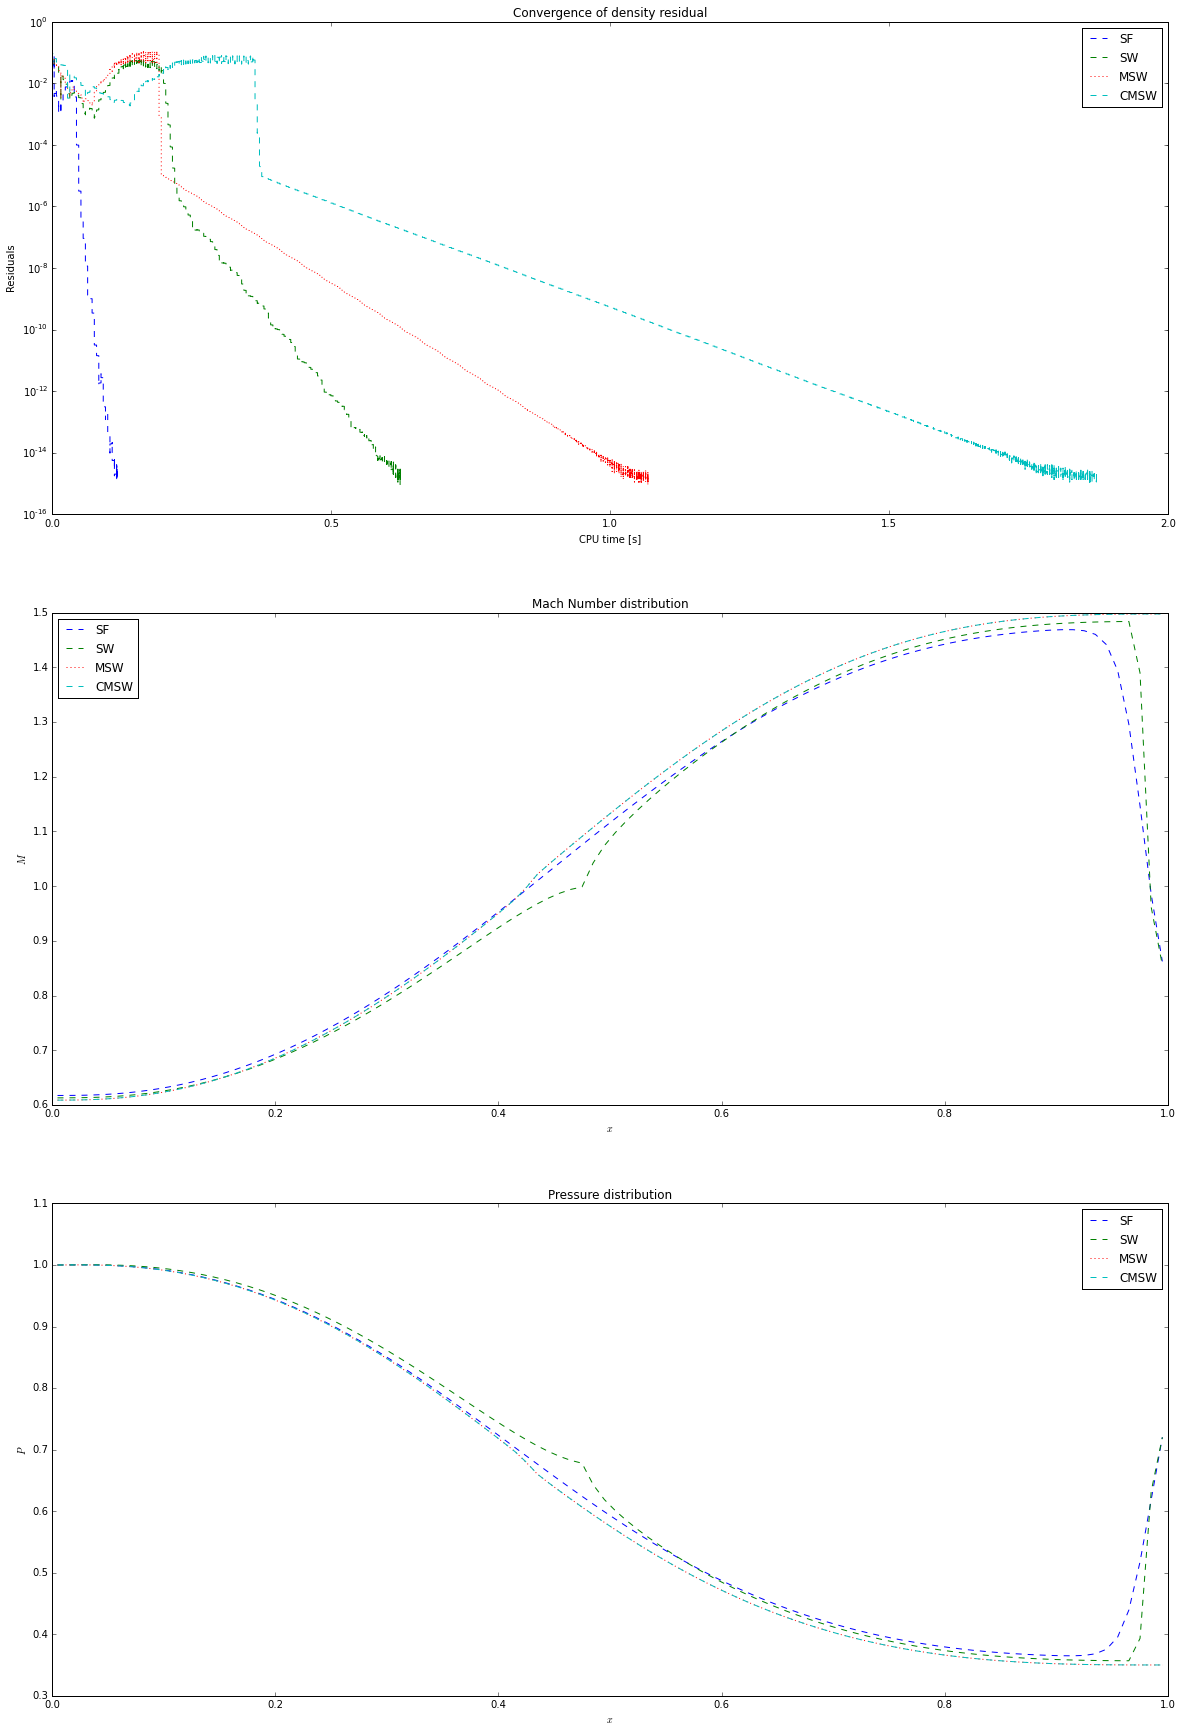

In [28]:
modify_param('max_iter', 40000)
modify_param('nx', 100)
modify_param('eps', 0.4)
modify_param('p_exit_ratio', 0.72)
flx_schemes = [
    (1, 'SF'),
    (2, 'SW'),
    (3, 'MSW'),
    (4, 'CMSW'),
]
linestyle = 'dashed'
styles = [linestyle, linestyle, ':', linestyle]
opt = {'marker': None, 'linestyle': linestyle}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
results = []
for i, flx_scheme in flx_schemes:
    modify_param('flx_scheme', i)
    run()
    state, resi, time = read_data()
    opt['linestyle'] = styles[i-1]
    plot_residual_time(resi, time, ax1, label='%s' % flx_scheme, **opt)
    plot_mach(state, ax2, label='%s' % flx_scheme, **opt)
    plot_pressure(state, ax3, label='%s' % flx_scheme, **opt)
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.show()

### Discussion

Modified and Corrected-Modified Steger Warming dissipate the exit shock completely! I would've expected Steger-Warming to dissipate it and not Modified or Corrected-Modified, since the regular Steger-Warming is supposed to be more dissipative. 

Also, one can notice that Steger-Warming shows a discontinuity around where the flow changes from subsonic to supersonic. This is "corrected" by Modified and Corrected-Modified Steger Warming. 

----
# Question 5 - Temporal Discretization Scheme Study

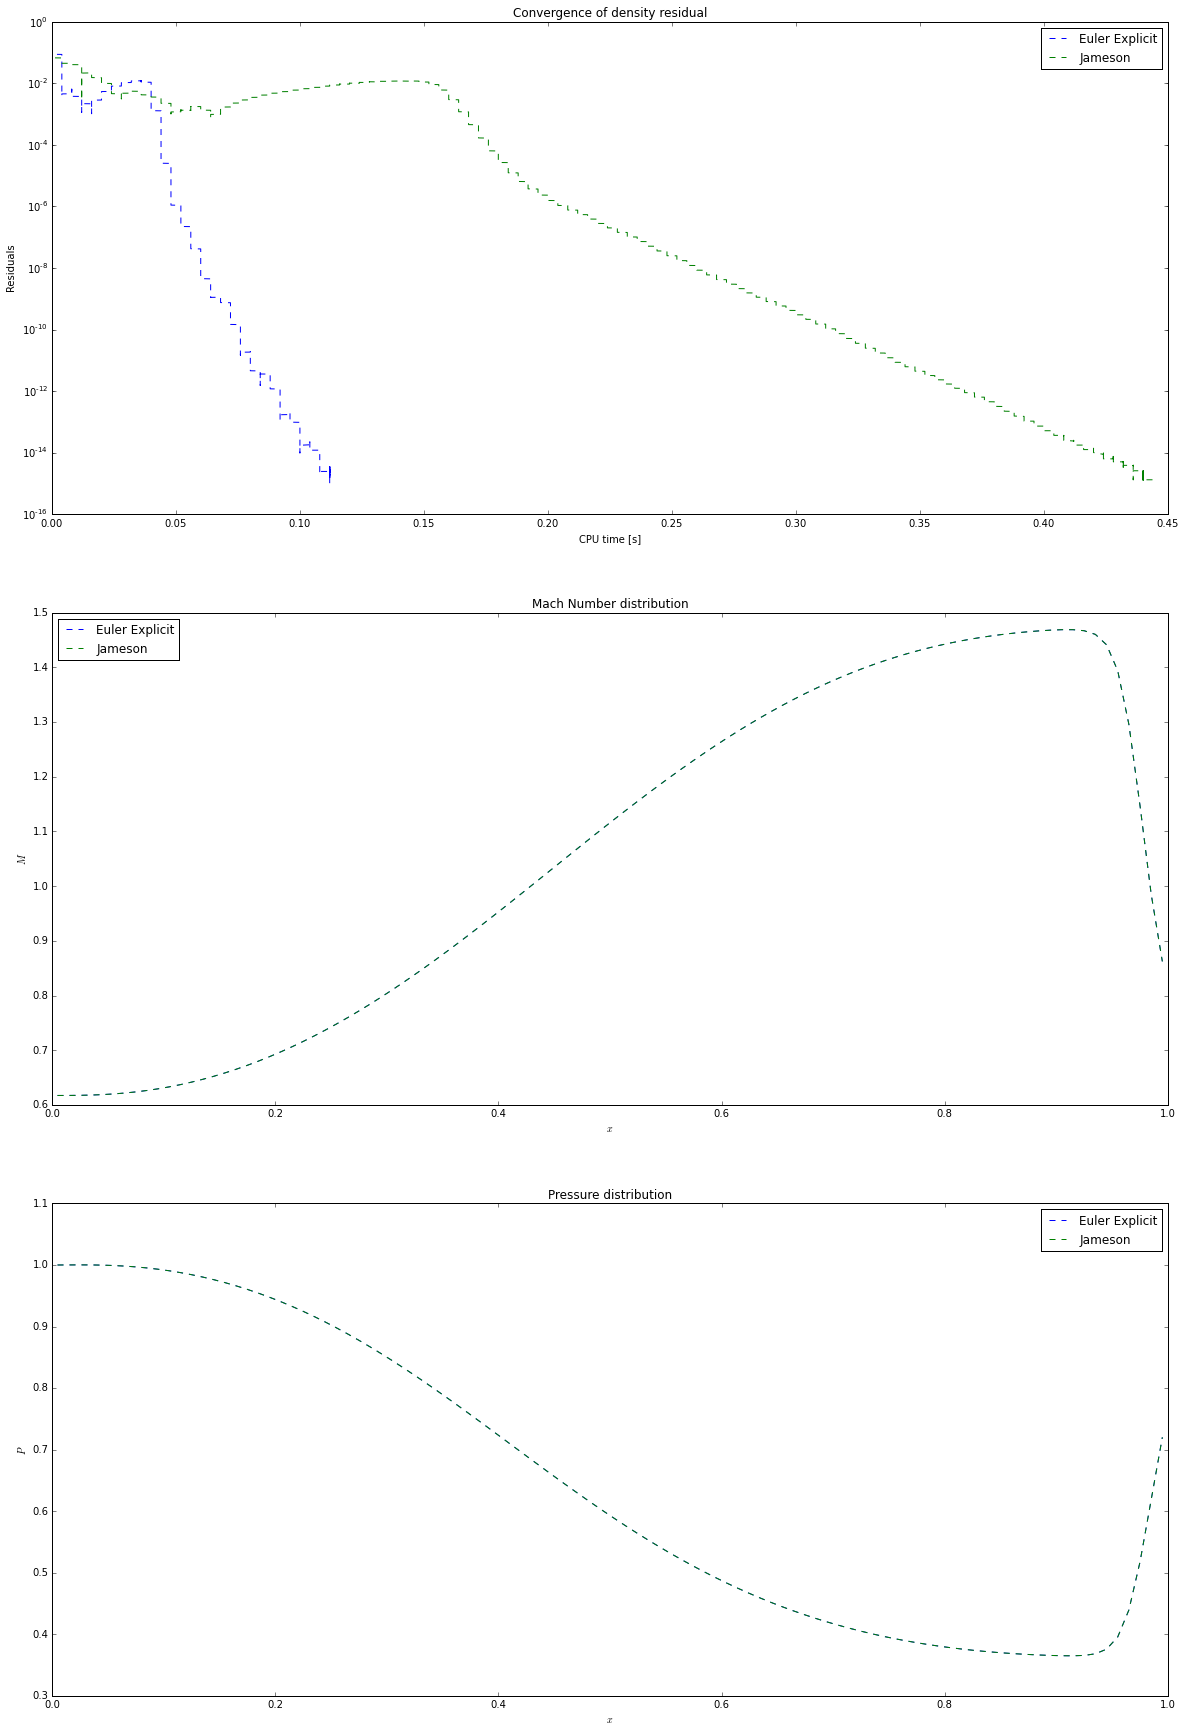

In [30]:
modify_param('flx_scheme', 1)
time_schemes = [
    (1, 'Euler Explicit'),
    (2, 'Jameson'),
]
opt = {'marker': None}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
results = []
for i, time_scheme in time_schemes:
    modify_param('timestep_scheme', i)
    run()
    state, resi, time = read_data()
    plot_residual_time(resi, time, ax1, label='%s' % time_scheme, **opt)
    plot_mach(state, ax2, label='%s' % time_scheme, **opt)
    plot_pressure(state, ax3, label='%s' % time_scheme, **opt)
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.show()

Jameson's timestepping scheme takes almost 5 times as long, but both yield the exact same results in this case. 